<a href="https://colab.research.google.com/github/M7mdNassar/Mobile-Price-Classification/blob/main/Mobile_Price_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim: Classification to Predict Mobile Phone Prices



In [238]:
# Importing libraries
import pandas as pd    # Data manipulation library
import numpy as np     # Numerical computations library
from sklearn.metrics import confusion_matrix, accuracy_score     # Metrics for evaluating machine learning models
import matplotlib.pyplot as plt    # Plotting library
import seaborn as sns              # Data visualization library
import warnings                    # Warning control module

# Set up the layout
font = {'size': 14}                        # Font size for plots
plt.rc('font', **font)                     # Set the default font size for matplotlib
warnings.filterwarnings("ignore")          # Ignore warning messages


## **Load dataset**


In [239]:
# Import Dataset
data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
x = data.iloc[:,0:20]       # x represent the input features from training data (independent variables)
y = data.iloc[:,20]         # y represent the target (column number 21 in our data) (dependent variables)
pd.set_option('display.max_columns', None)     #(None) Set the option to display all columns



In [240]:
#Inspecting the training Dataset
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [241]:
#Inspecting the Test Dataset
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


<Axes: xlabel='price_range', ylabel='count'>

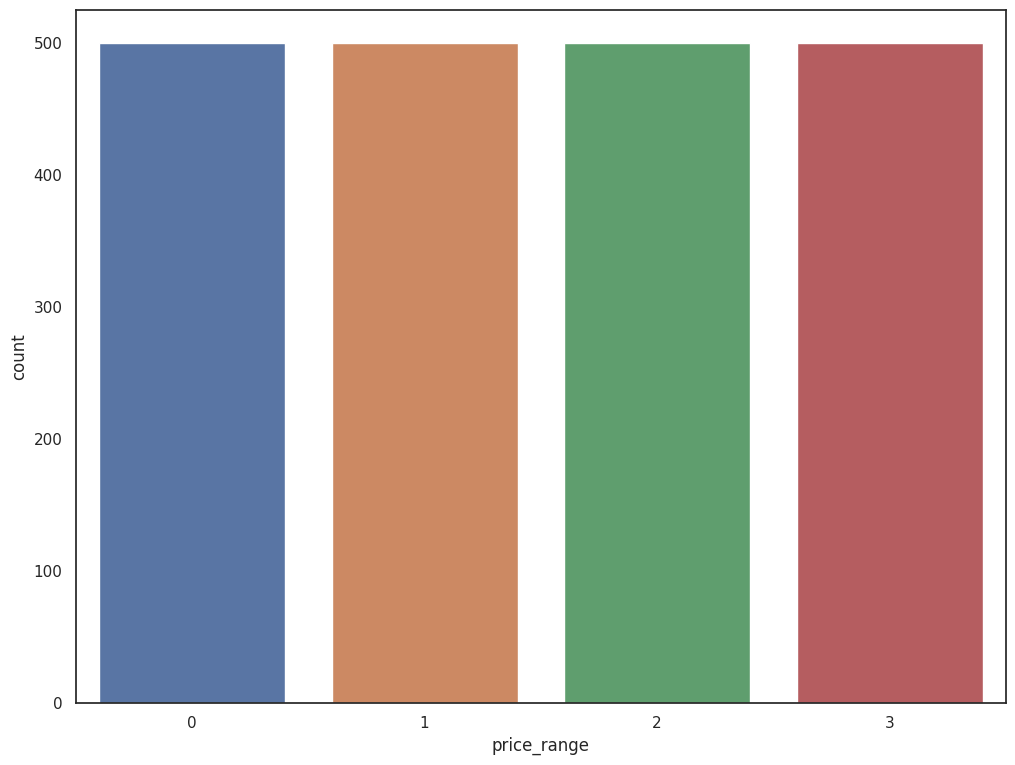

In [263]:
sns.countplot(data=data, x='price_range')    # we have balance target values


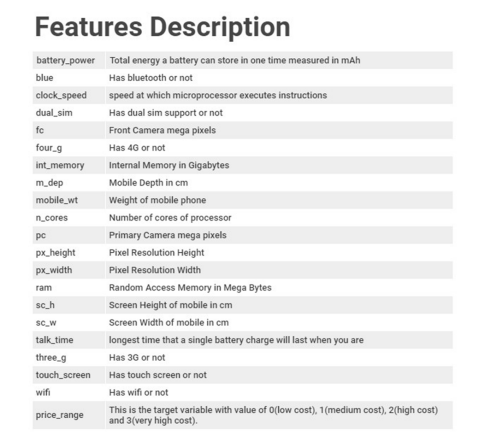


#Data Preprocessing

In [243]:
#Checking the missing values in our dataset if any
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [244]:
#Display information about our dataset
print("------------>Information about the Dataset<------------")
print()
data.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  


#Now, we have some zero values of **screen width & pixel resolution height** in our data

In [245]:
# the mobile dimensions cannot be zero !!

print(len(data[data.sc_w==0]))

print(len(data[data.px_height==0]))

180
2


In [246]:
# set the mean of sc_w instead invalid values

data['sc_w'][data[data.sc_w == 0].index] = data.sc_w.mean()

data['px_height'][data[data.px_height == 0].index] = data.px_height.mean()

print("The number of Zero value of sc_w Now: ",len(data[data.sc_w==0]))
print("The number of Zero value of px_height Now: ",len(data[data.px_height==0]))

The number of Zero value of sc_w Now:  0
The number of Zero value of px_height Now:  0


In [247]:
#Summary statistics of the training dataset
descrip = data.describe()
#Summary statistics of the test dataset
descrip_test = test_data.describe()
print("------------>Decription of the Training Data<------------")
print()
pd.DataFrame(data = descrip)

------------>Decription of the Training Data<------------



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.753108,1251.515500,2124.213000,12.306500,6.28603,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.310973,432.199447,1084.732044,4.213245,3.96408,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,1.000000,500.000000,256.000000,5.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,284.000000,874.750000,1207.500000,9.000000,3.00000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,568.000000,1247.000000,2146.500000,12.000000,5.76700,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.00000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.00000,20.000000,1.000000,1.000000,1.000000,3.000000


In [248]:
print("------------>Decription of the Testing Data<------------")
print()
pd.DataFrame(data = descrip_test)

------------>Decription of the Testing Data<------------



,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


Text(0.5, 1.0, 'Correlation of Attirubtues')

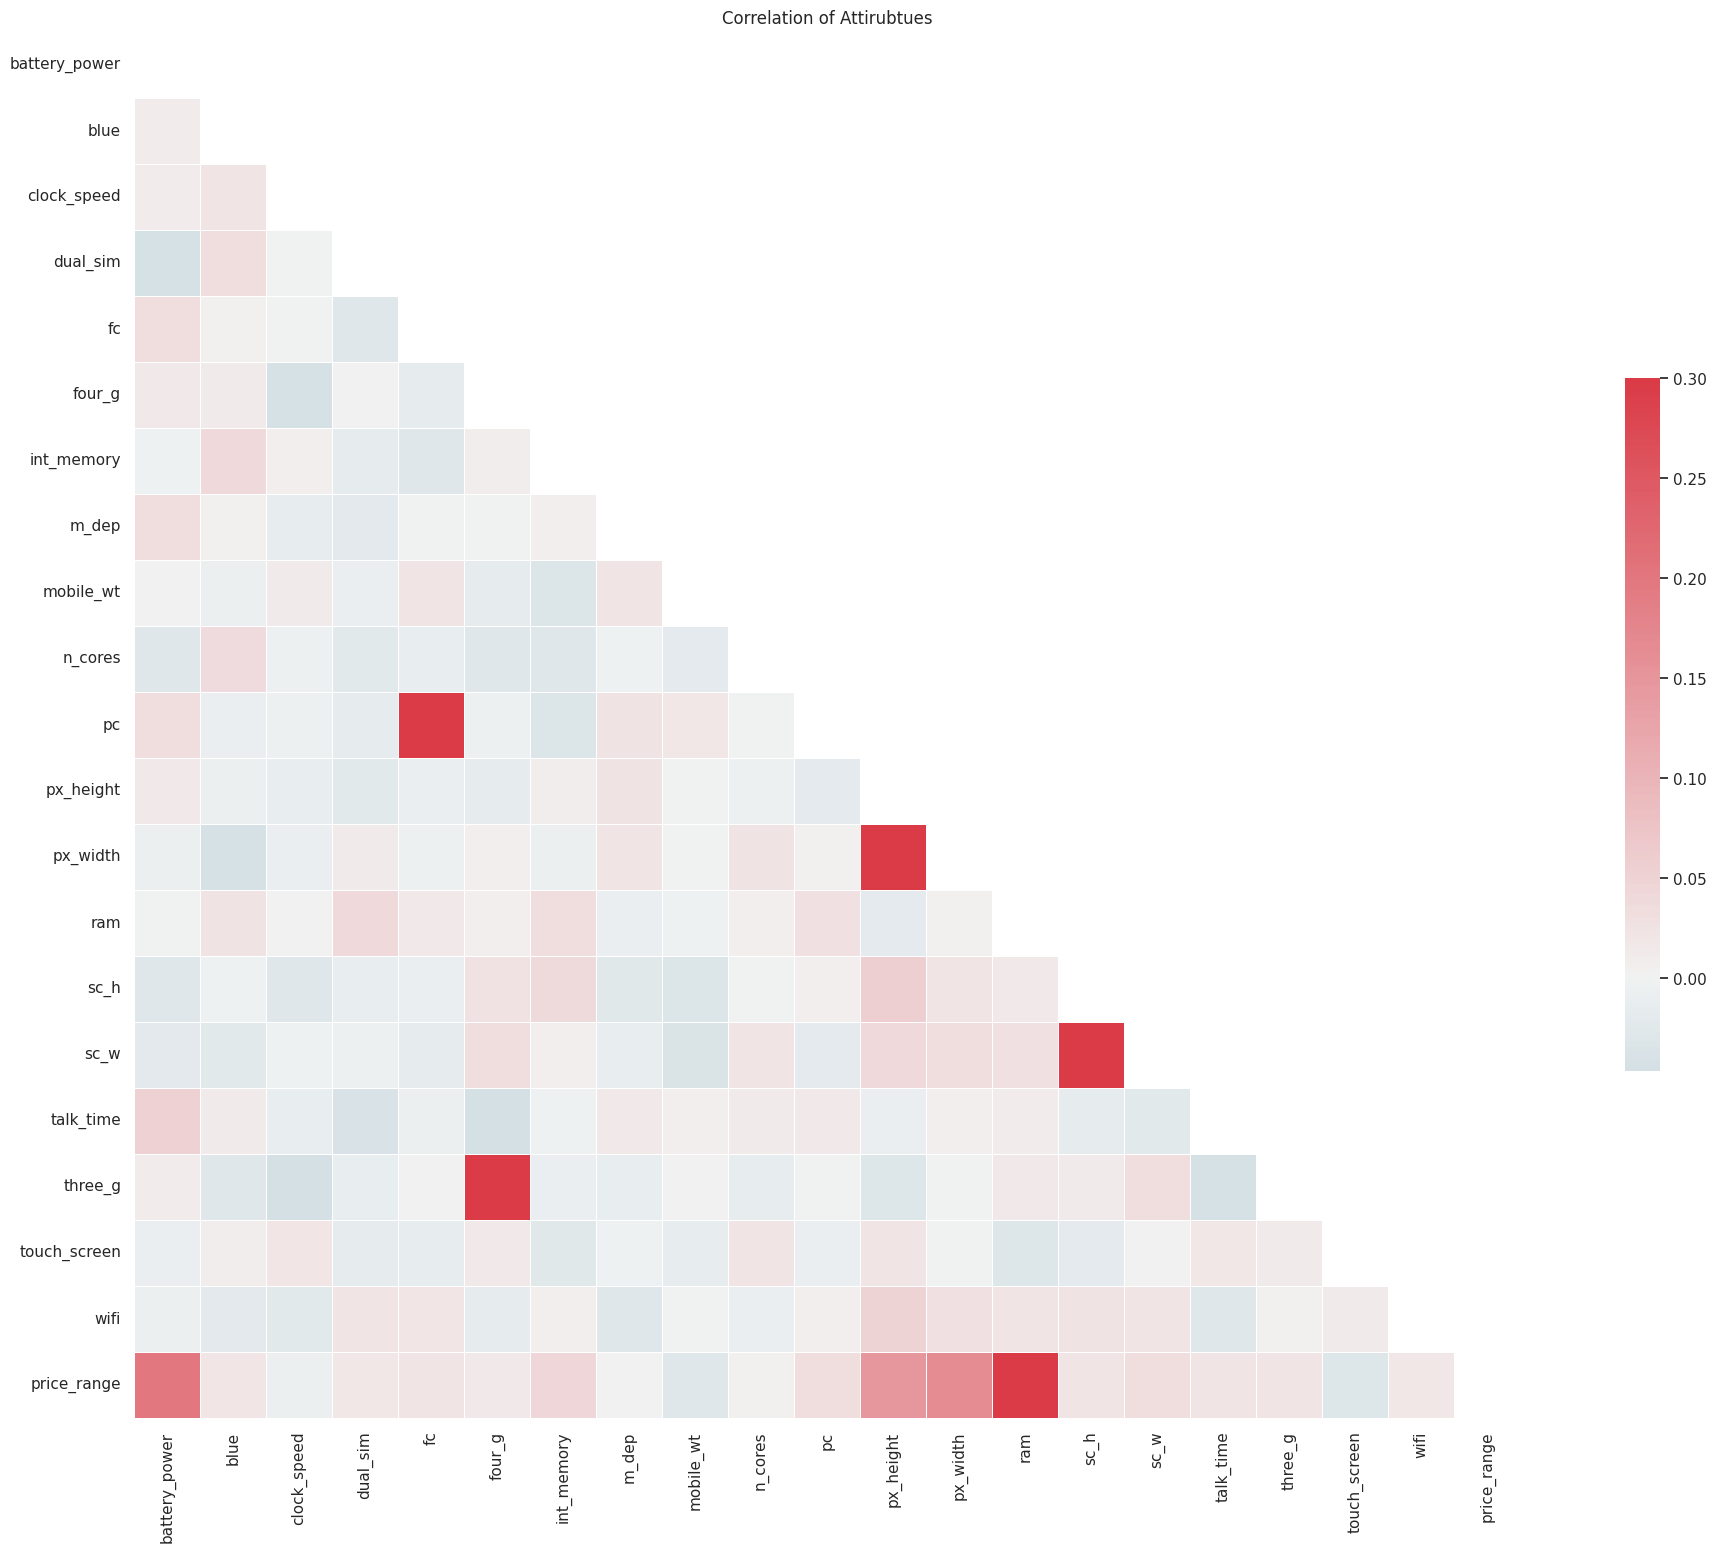

In [249]:
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()  #The correlation matrix contains the pairwise correlations between all the attributes in the dataset.
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attirubtues")

#High positive correlation observed between:

"pc" and "fc" (primary camera mega pixels and front camera mega pixels)

---

"three_g" and "four_g" (3G network support and 4G network support)

---

"px_width" and "px_height" (pixel resolution width and pixel resolution height)


---




------------>Outlier Analysis of Non-Categorical Data<------------



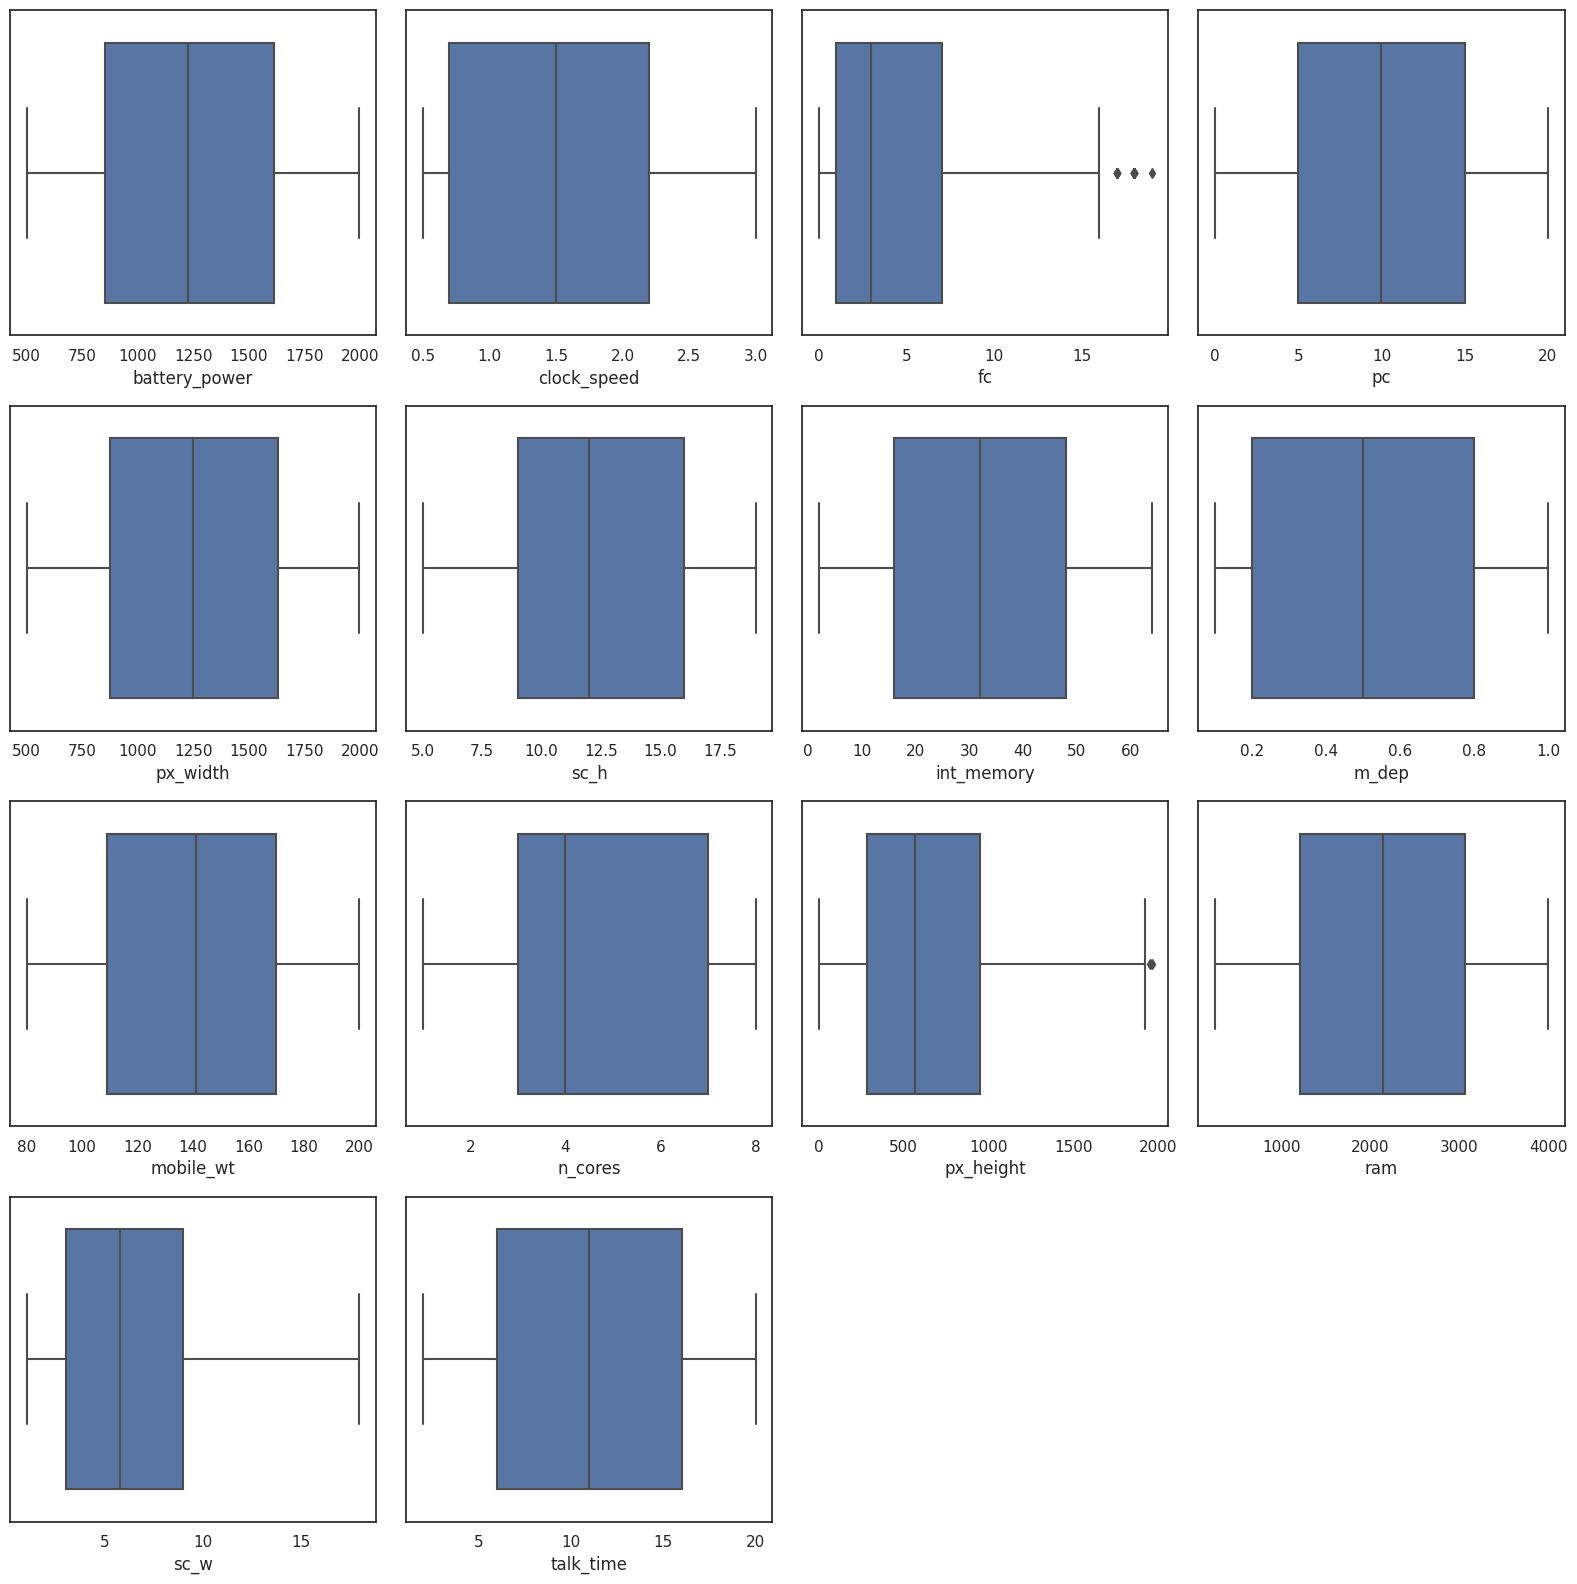

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

print("------------>Outlier Analysis of Non-Categorical Data<------------")
print()

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

sns.boxplot(x=data['battery_power'], ax=ax[0, 0])
sns.boxplot(x=data['clock_speed'], ax=ax[0, 1])
sns.boxplot(x=data['fc'], ax=ax[0, 2])
sns.boxplot(x=data['pc'], ax=ax[0, 3])
sns.boxplot(x=data['px_width'], ax=ax[1, 0])
sns.boxplot(x=data['sc_h'], ax=ax[1, 1])
sns.boxplot(x=data['int_memory'], ax=ax[1, 2])
sns.boxplot(x=data['m_dep'], ax=ax[1, 3])
sns.boxplot(x=data['mobile_wt'], ax=ax[2, 0])
sns.boxplot(x=data['n_cores'], ax=ax[2, 1])
sns.boxplot(x=data['px_height'], ax=ax[2, 2])
sns.boxplot(x=data['ram'], ax=ax[2, 3])
sns.boxplot(x=data['sc_w'], ax=ax[3, 0])
sns.boxplot(x=data['talk_time'], ax=ax[3, 1])

# Remove empty subplots
fig.delaxes(ax[3, 2])
fig.delaxes(ax[3, 3])

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



There are a few outliers in fc and px_height only.







Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

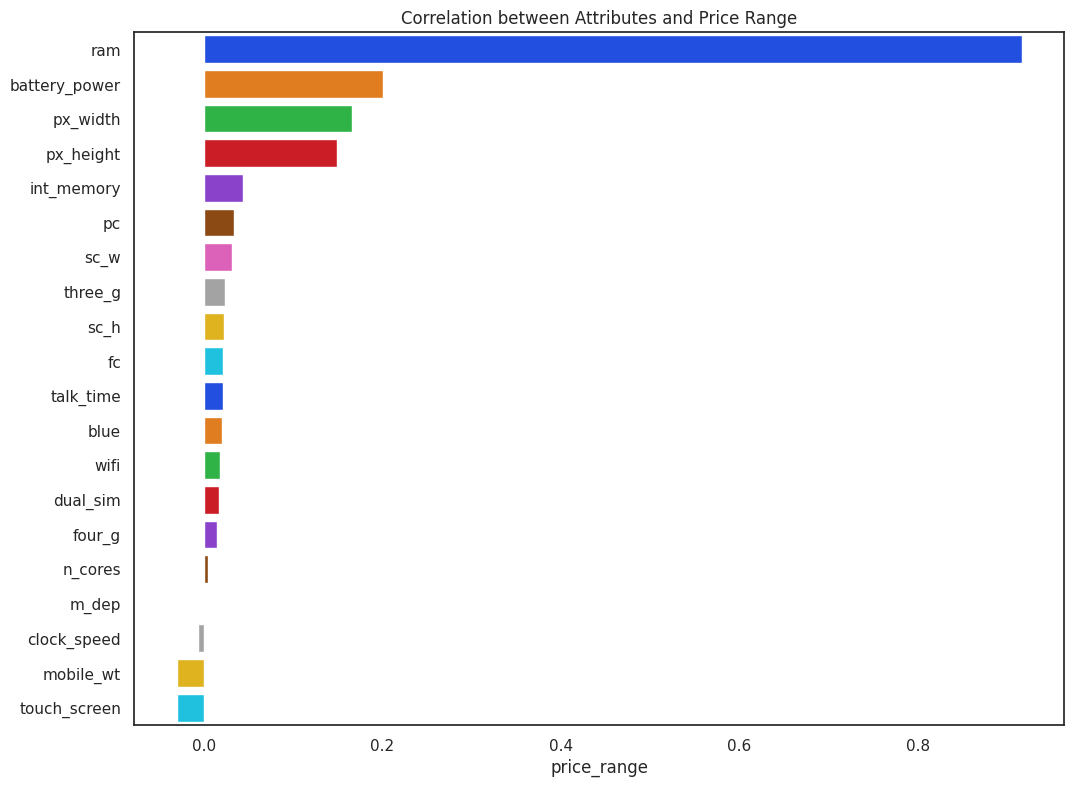

In [251]:
#we are not considering the correlations between X features among themselves      (each attribute effect on the target)
corr = data.corr() #calculates the correlation matrix for all the variables in the dataset data. Each cell in the matrix represents the correlation coefficient between two variables.
corr = corr.price_range #corr will now contain a Series object representing the correlation coefficients between "price_range" and all other variables in the dataset
cr = corr.sort_values(ascending = False)[1:]     #exclude the first value, which is the correlation of the "price_range" variable with itself (which will always be 1.0).
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

------------>Analysis of Attributes<------------



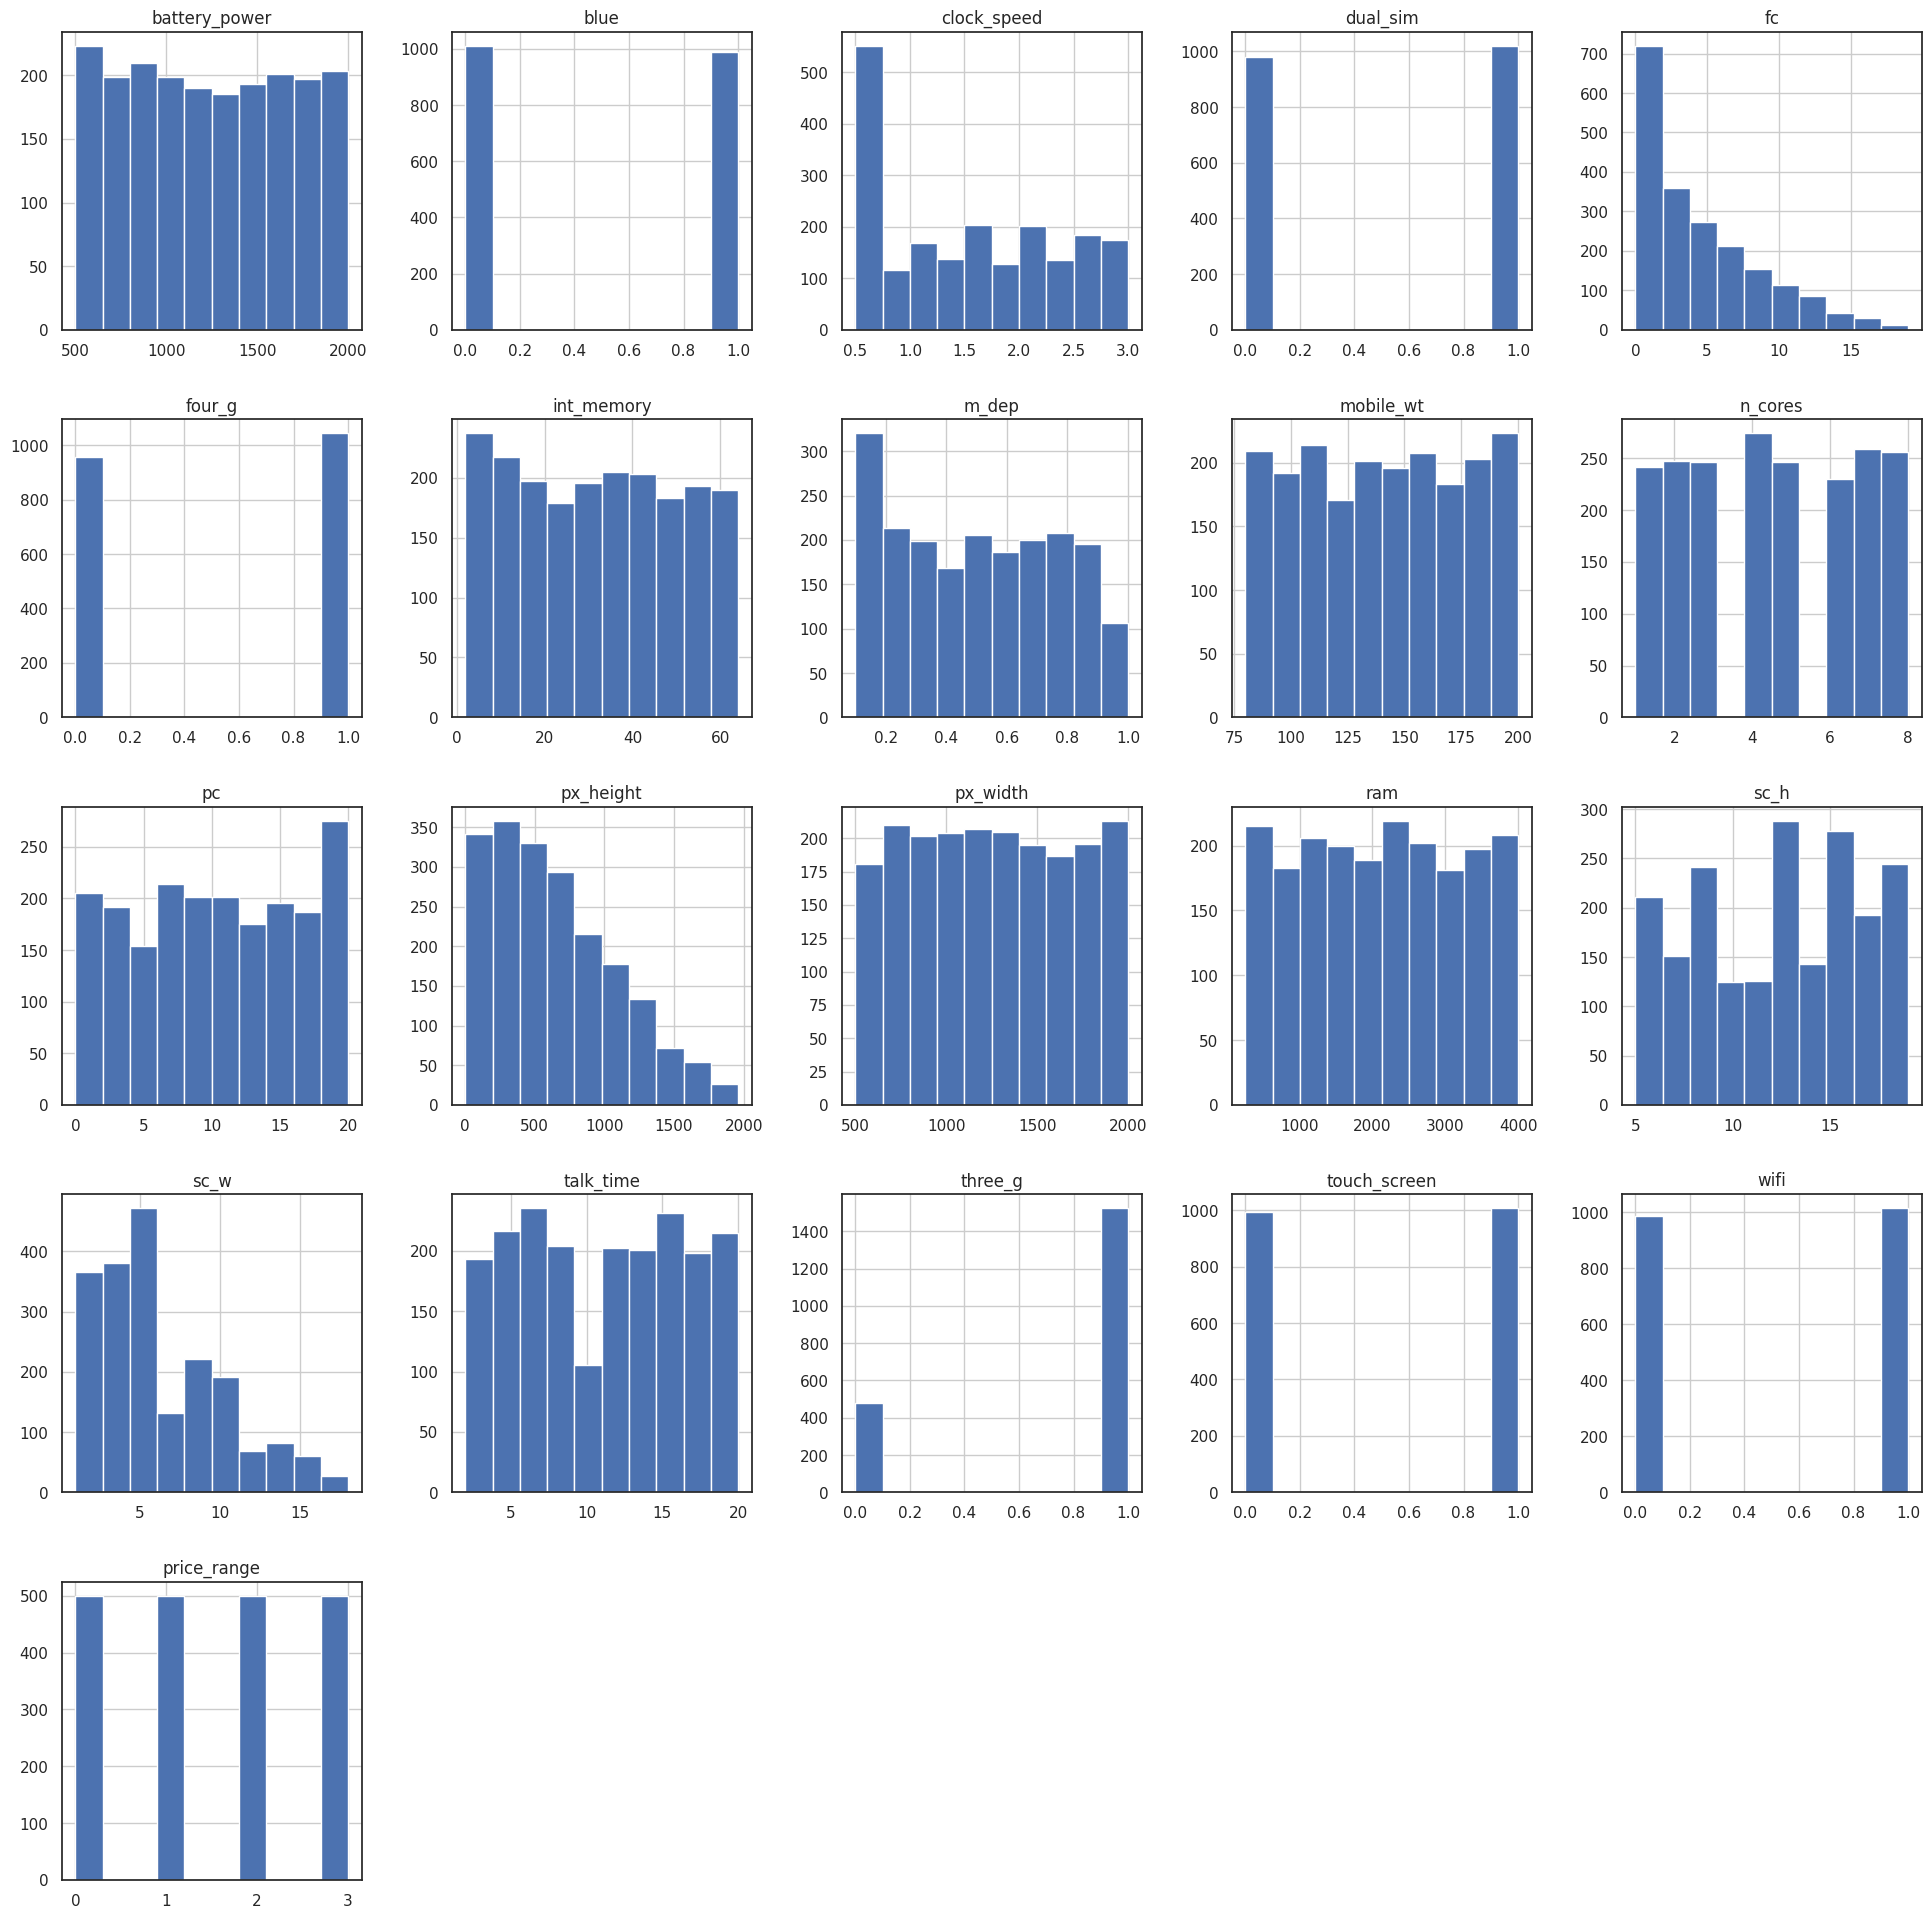

In [252]:
#data visualization drawing histogram
print("------------>Analysis of Attributes<------------\n")

data.hist(sharex=False, sharey=False, figsize=(24,24) )  #parameters sharex=False and sharey=False ensure that the x-axis and y-axis scales are independent for each histogram.
plt.show()

# Data Splitting

In [253]:
#Splitting the training and validation
# Splitting of data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify = y)


#  20% of the data will be used for validation.
# random splitting of the data will be the same each time the code is run with the same random_state value.
# ensure that the class distribution of the target variable is maintained in both the training and validation sets.


#Feature Scaling

In [254]:
                                       #Feature Scaling

# feature scaling is a preprocessing step that normalizes and standardizes the feature values,
# providing various benefits such as better convergence, improved model performance,
# and enhanced interpretability. It ensures fair comparisons between features and helps
# machine learning algorithms make more reliable and accurate predictions.


from sklearn.preprocessing import StandardScaler
#The StandardScaler is a preprocessing class used for standardizing features by removing the mean and scaling to unit variance.
sc = StandardScaler()   # create instance of StandardScaler class .
col = data.iloc[:,:20].columns   #This line selects the first 20 columns (features) of the 'data' DataFrame and assigns their column names to the 'col' variable.

# The fit_transform method (for sc instance) computes the mean and standard deviation of
# each feature in the training set and then scales the features based on these statistics.
#Benefits:    1- Improvement of algorithm convergence as SVM based distance make compute faster and reduce heigher value affect
#             2- Interpretability and visualization
x_train = sc.fit_transform(x_train)
x_valid = sc.fit_transform(x_valid)

#Implementation of Machine Learning Alogorithms:
We will apply different algorithms on the training and validation datasets to predict the mobile phone price. Then, we will select the best model based on the performance evaluation. Finally, we will utilize the chosen model to generate target values for the test dataset.


# Random Forest

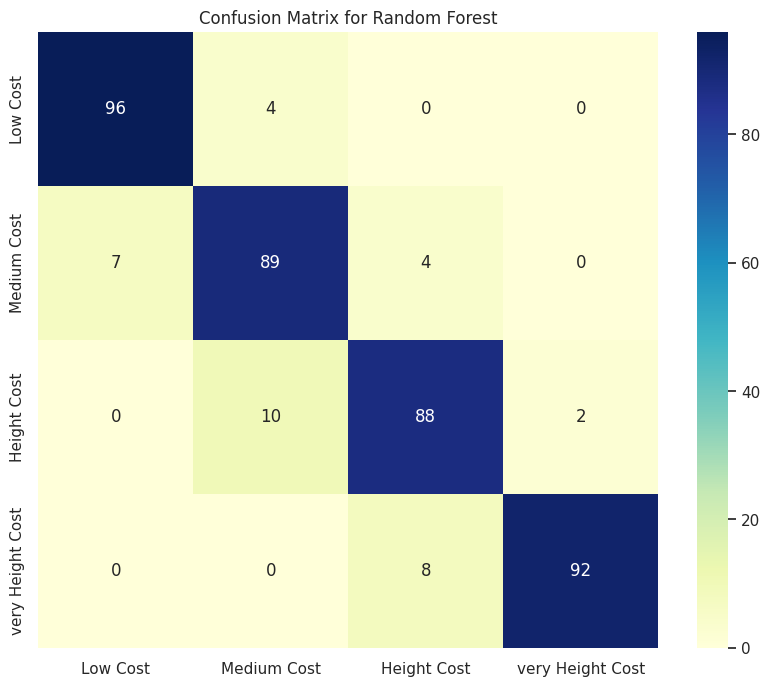

Text(0.5, 1.0, 'Visualizing Important Features for Random Forest')

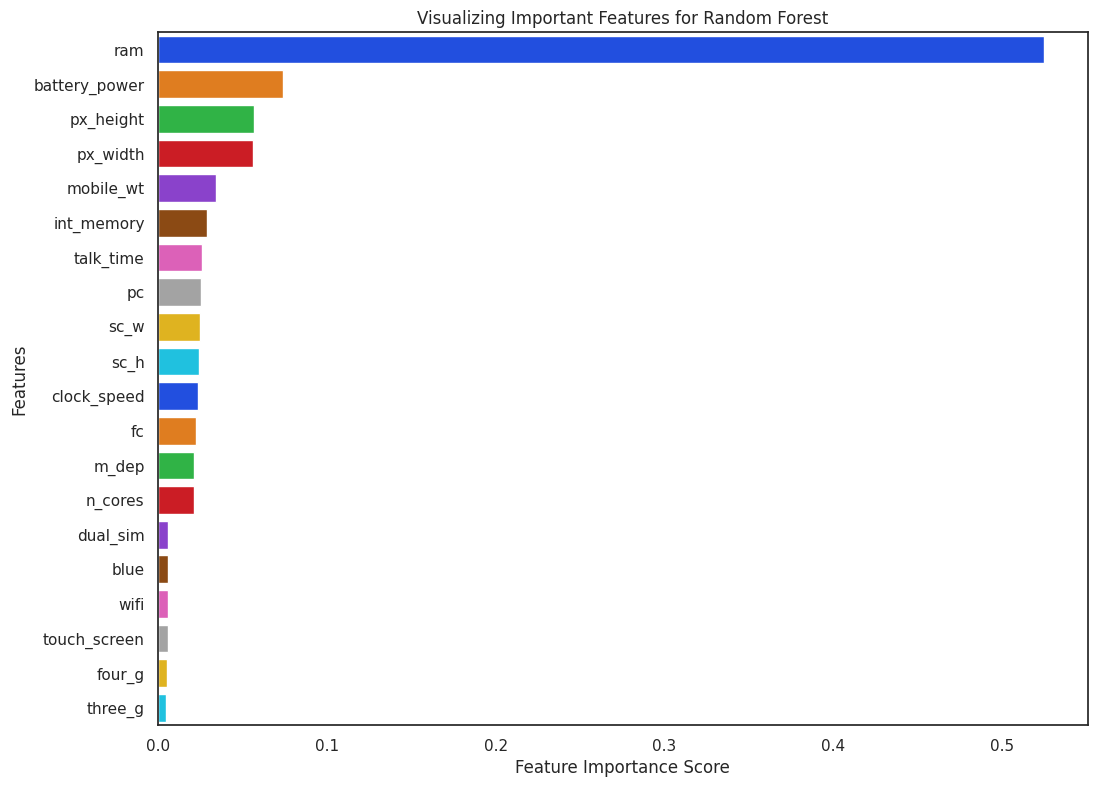

In [255]:
# ------------->RANDOM FOREST<------------
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state=0,criterion = 'entropy',oob_score = True)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_rf)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Medium Cost", "Height Cost", "very Height Cost"],index=["Low Cost", "Medium Cost", "Height Cost", "very Height Cost"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for Random Forest")
plt.show()
#Calculate Accuracy
acc_rf = accuracy_score(y_valid, y_pred_rf)
#Features Contribution
feature_imp = pd.Series(rf.feature_importances_,index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Random Forest")

# SVM

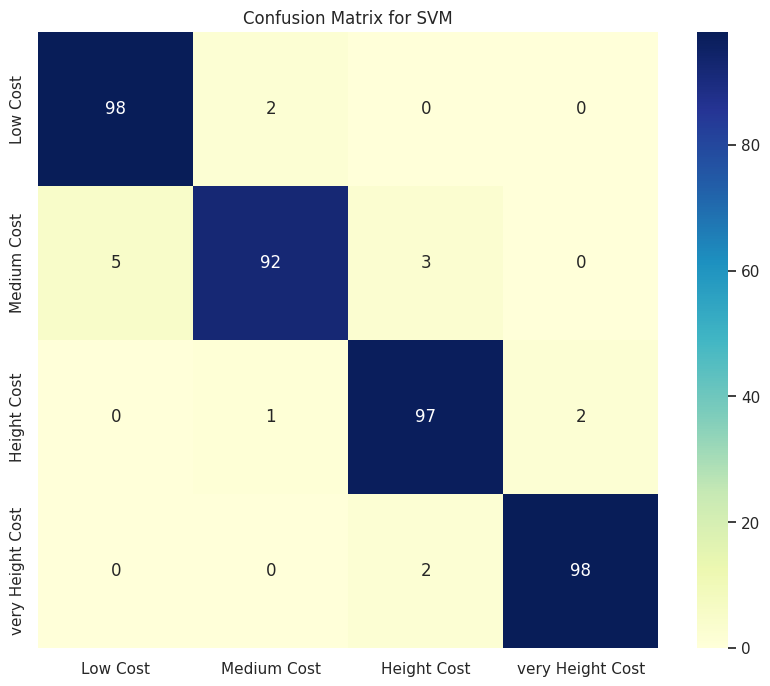

Text(0.5, 1.0, 'Visualizing Important Features for SVM')

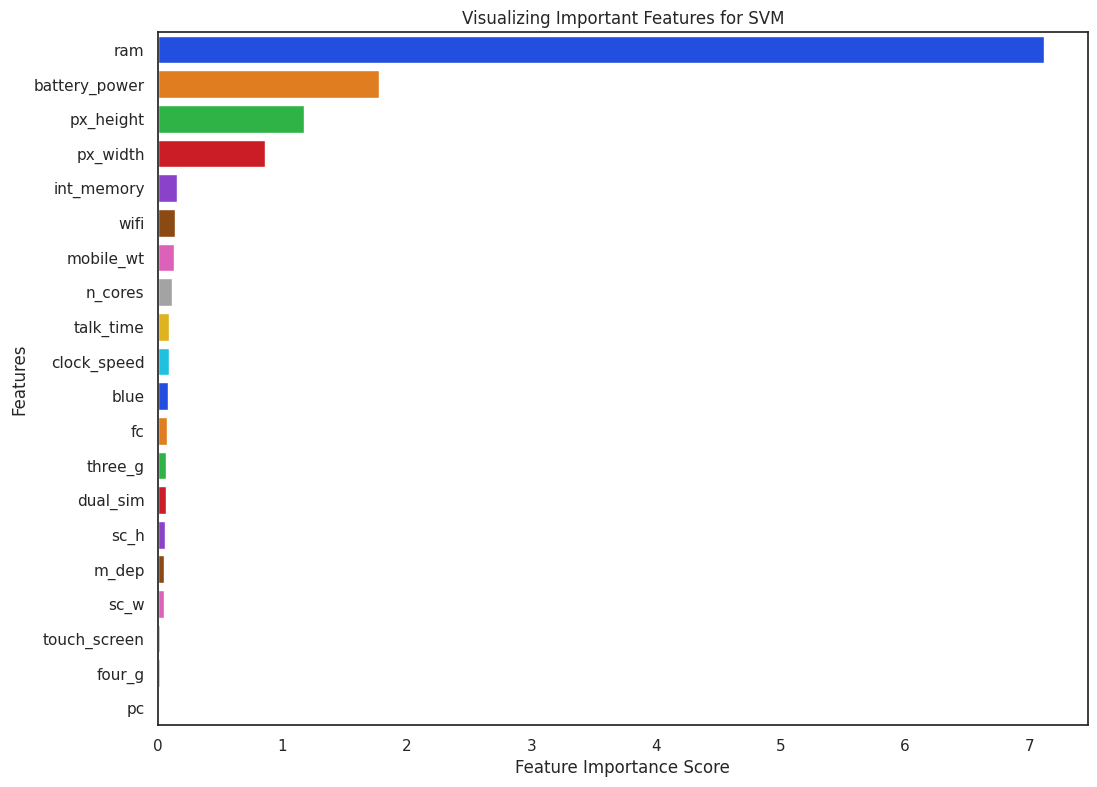

In [256]:
#------------->SVM<-------------
from sklearn.svm import SVC
svm = SVC(kernel = 'linear',random_state = 0)
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_valid)
#Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_svm)
# label the confusion matrix
conf_matrix=pd.DataFrame(data=cm,columns=["Low Cost", "Medium Cost", "Height Cost", "very Height Cost"],index=["Low Cost", "Medium Cost", "Height Cost", "very Height Cost"])
# plot a heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix for SVM")
plt.show()
#Calculate Accuracy
acc_svm = accuracy_score(y_valid, y_pred_svm)
#Features Contribution
feature_imp = pd.Series(abs(svm.coef_[0]), index=col).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index,palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for SVM")

# ANN

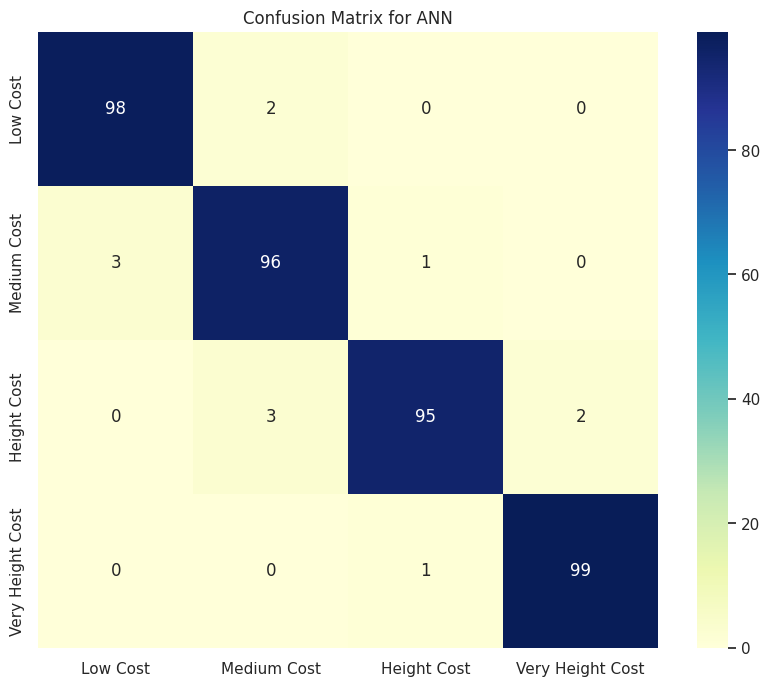

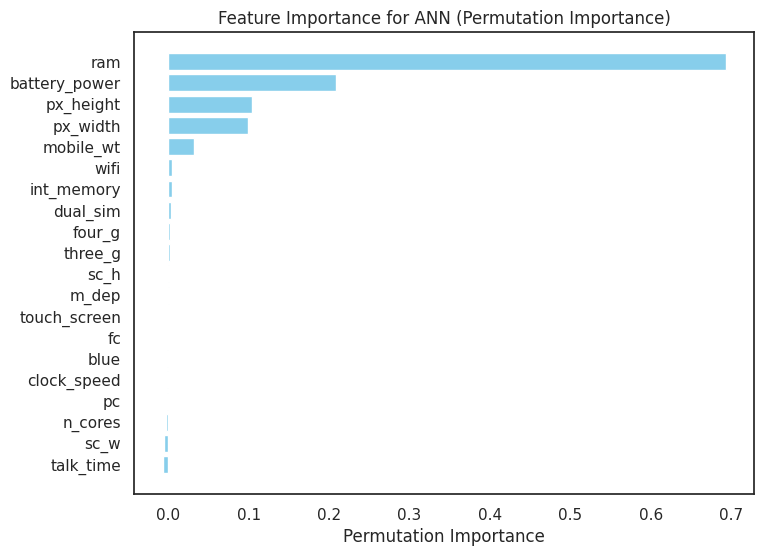

In [257]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

# Create and train the ANN model
ann = MLPClassifier(hidden_layer_sizes=(4, 5) ,random_state=0)  # hidden_layer_sizes 4 layers with 5 neurons in each layer .
ann.fit(x_train, y_train)                                       # verbose = false (default) , learning_rate = 0.001 (default).
y_pred_ann = ann.predict(x_valid)

# Visualizing the Confusion Matrix
cm = confusion_matrix(y_valid, y_pred_ann)
conf_matrix = pd.DataFrame(data=cm, columns=["Low Cost", "Medium Cost", "Height Cost", "Very Height Cost"],
                           index=["Low Cost", "Medium Cost", "Height Cost", "Very Height Cost"])

# Plot a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix for ANN")
plt.show()

# Calculate Accuracy
acc_ann = accuracy_score(y_valid, y_pred_ann)

# Feature Importance Analysis using Permutation Importance
result = permutation_importance(ann, x_valid, y_valid, n_repeats=10, random_state=0)
feature_importance = result.importances_mean
feature_names = col
sorted_idx = feature_importance.argsort()

# Plotting Feature Importance
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels([feature_names[i] for i in sorted_idx])
ax.set_xlabel('Permutation Importance')
plt.title("Feature Importance for ANN (Permutation Importance)")
plt.show()

In [258]:

models = ['RF', 'SVM', 'ANN']
acc_scores = [acc_rf, acc_svm, acc_ann]

print("Models\tAccuracy\n")
for i in range(len(models)):
    print(str(models[i]) + "\t" + str(acc_scores[i]), end='\n')

Models	Accuracy

RF	0.9125
SVM	0.9625
ANN	0.97



------------>We decide from the Bar Graph that the best Model is ANN<------------


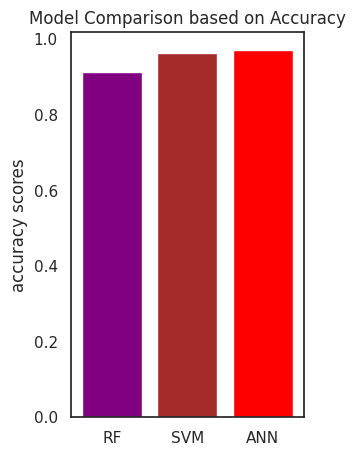

In [259]:
#------------>Finding the Best Algorithm<----------

print("\n------------>We decide from the Bar Graph that the best Model is ANN<------------")
plt.rcParams['figure.figsize'] = (3,5)
plt.bar(models, acc_scores, color=['purple','brown','red'])

plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
plt.show()

In [260]:
#------------>Using the Best (ANN) <-------------

# Remove ID column(extra)
test_data=test_data.drop('id',axis=1)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test = sc.fit_transform(test_data)


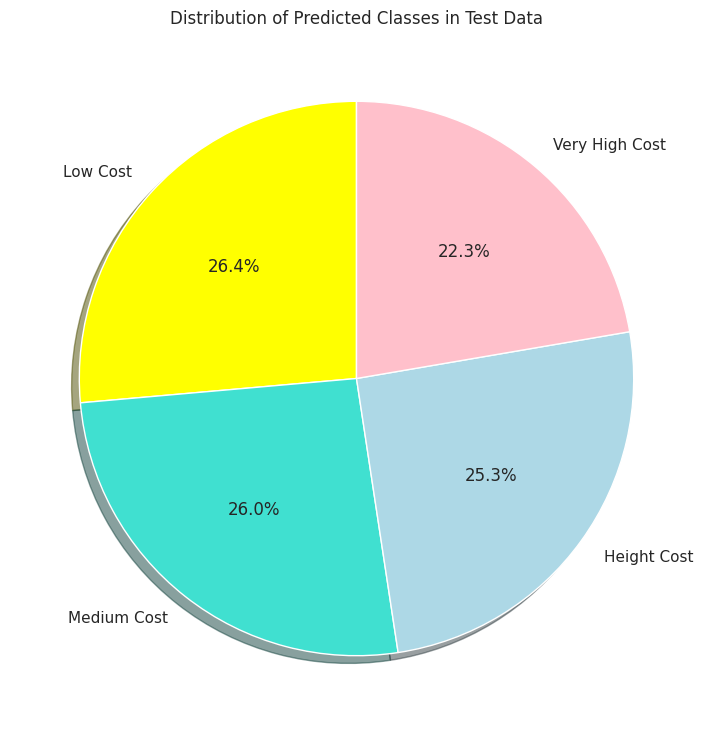

In [261]:
# Perform prediction using ANN
predicted_price_range = ann.predict(test)

# Assign predicted price range to test data
test_data['price_range'] = predicted_price_range
y_test = test_data['price_range']
# Count the occurrences of each predicted price range
values = test_data['price_range'].value_counts().values

# Define labels and colors for the pie chart
labels = ["Low Cost", "Medium Cost", "Height Cost", "Very High Cost"]
colors = ['yellow', 'turquoise', 'lightblue', 'pink']

# Plot the distribution of predicted classes
plt.rcParams['figure.figsize'] = (12, 9)
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('Distribution of Predicted Classes in Test Data')
plt.show()

In [262]:
from sklearn.metrics import classification_report, accuracy_score

# Confusion Matrix
print("\n------------>Classification Report for ANN<------------")
confusion_ann = confusion_matrix(y_test, predicted_price_range)

# Calculate metrics for class 0
precision_0, recall_0, fscore_0, _ = classification_report(y_valid == 0, y_pred_ann == 0, output_dict=True)["True"].values()
accuracy_0 = accuracy_score(y_valid == 0, y_pred_ann == 0)

# Calculate metrics for class 1
precision_1, recall_1, fscore_1, _ = classification_report(y_valid == 1, y_pred_ann == 1, output_dict=True)["True"].values()
accuracy_1 = accuracy_score(y_valid == 1, y_pred_ann == 1)

# Calculate metrics for class 2
precision_2, recall_2, fscore_2, _ = classification_report(y_valid == 2, y_pred_ann == 2, output_dict=True)["True"].values()
accuracy_2 = accuracy_score(y_valid == 2, y_pred_ann == 2)

# Calculate metrics for class 3
precision_3, recall_3, fscore_3, _ = classification_report(y_valid == 3, y_pred_ann == 3, output_dict=True)["True"].values()
accuracy_3 = accuracy_score(y_valid == 3, y_pred_ann == 3)

print("-----------------------------------------------------------------")
print("\t " "  Low Cost \t Medium Cost \t Heigh Cost \t Very Heigh Cost")
print("-----------------------------------------------------------------")
print("Accuracy:" + "  " + str("%.4f" % accuracy_0) + " \t " + str("%.4f" % accuracy_1) +"\t"+" \t " + str("%.4f" % accuracy_2) +"\t"+ " \t " + str("%.4f" % accuracy_3) + "\n")
print("Precision:" + " " + str("%.4f" % precision_0) + " \t " + str("%.4f" % precision_1) +"\t"+" \t " + str("%.4f" % precision_2) +"\t"+ " \t " + str("%.4f" % precision_3) + "\n")
print("Recall:" + "    " + str("%.4f" % recall_0) + " \t " + str("%.4f" % recall_1) +"\t"+" \t " + str("%.4f" % recall_2) +"\t"+ " \t " + str("%.4f" % recall_3) + "\n")
print("F-score:" + "   " + str("%.4f" % fscore_0) + " \t " + str("%.4f" % fscore_1) +"\t"+" \t " + str("%.4f" % fscore_2) +"\t"+ " \t " + str("%.4f" % fscore_3) )
print("-----------------------------------------------------------------")



------------>Classification Report for ANN<------------
-----------------------------------------------------------------
	   Low Cost 	 Medium Cost 	 Heigh Cost 	 Very Heigh Cost
-----------------------------------------------------------------
Accuracy:  0.9875 	 0.9775	 	 0.9825	 	 0.9925

Precision: 0.9703 	 0.9505	 	 0.9794	 	 0.9802

Recall:    0.9800 	 0.9600	 	 0.9500	 	 0.9900

F-score:   0.9751 	 0.9552	 	 0.9645	 	 0.9851
-----------------------------------------------------------------


#Conclusion

In this project, we compared three machine learning algorithms: Random Forest (RF), Support Vector Machine (SVM), and Artificial Neural Network (ANN).
We used these algorithms to predict the price range of mobile phones based on various features.

After training and evaluating the models, we observed the following results:


*   RF achieved an accuracy of 91.25% on the validation set. It also performed well but slightly lower than ANN.
*   SVM achieved an accuracy of 96.25% on the validation set. It showed a good performance in predicting the price range of mobile phones.

*   ANN achieved the highest accuracy of 97% on the validation set. It outperformed both SVM and RF in predicting the price range.



Based on these results, we can conclude that the Artificial Neural Network (ANN) model is the most accurate and reliable for predicting the price range of mobile phones in our dataset.

However, it's important to note that the performance of these models may vary depending on the dataset and the specific problem at hand. It's always recommended to experiment with different algorithms and evaluate their performance before drawing final conclusions.

Overall, this project demonstrates the effectiveness of machine learning algorithms in predicting the price range of mobile phones, and the potential application of these models in the mobile industry for pricing and market analysis.

Thank you for your attention!